In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cmocean
from salishsea_tools import bio_tools as bio
from salishsea_tools import viz_tools, visualisations
import netCDF4 as nc
import os

%matplotlib inline

In [2]:
# load necessary files
namdir='/results2/SalishSea/hindcast.201905/01jan15/'
resDir='/data/sallen/results/MEOPAR/averages/'
nampisprod=bio.load_nml_bio(namdir,'nampisprod')
fdia=dict()
fptc=dict()
for mon in ['jun','jul','aug']:
    fdia[mon]=nc.Dataset(os.path.join(resDir,'SalishSea_'+mon+'_climate_2007_2019_carp_T.nc'))
    fptc[mon]=nc.Dataset(os.path.join(resDir,'SalishSea_'+mon+'_climate_2007_2019_ptrc_T.nc'))
m=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
tmask=m.variables['tmask'][:,:,:,:]
tmask=np.copy(m.variables['tmask'])
navlon=np.copy(m.variables['nav_lon'])
navlat=np.copy(m.variables['nav_lat'])
m.close()
fb=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fm=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
titles={'jun':'June Limitation','jul':'July Limitation','aug':'August Limitation'}

In [3]:
cm1=cmocean.cm.ice
cm2=ListedColormap(np.array([[.6,0.3,1],[0,1,0],[1,.5,0]]))

/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/visualisations.py:117: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = axes.pcolormesh(xx_thal, dep_thal, var_plot, cmap=cmap, **mesh_args)


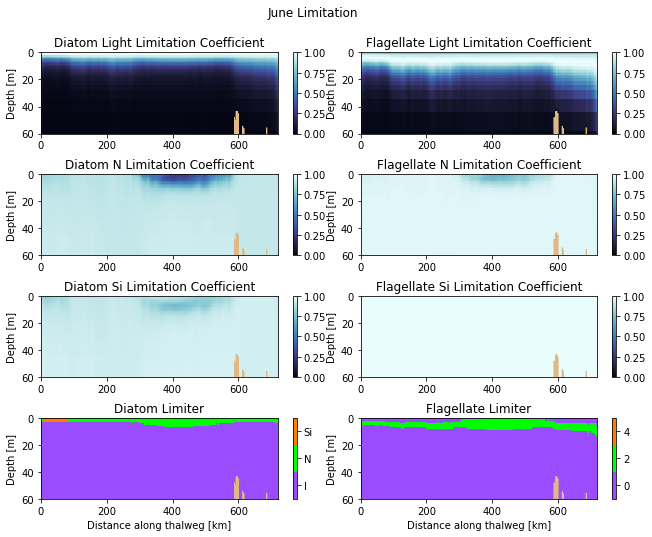

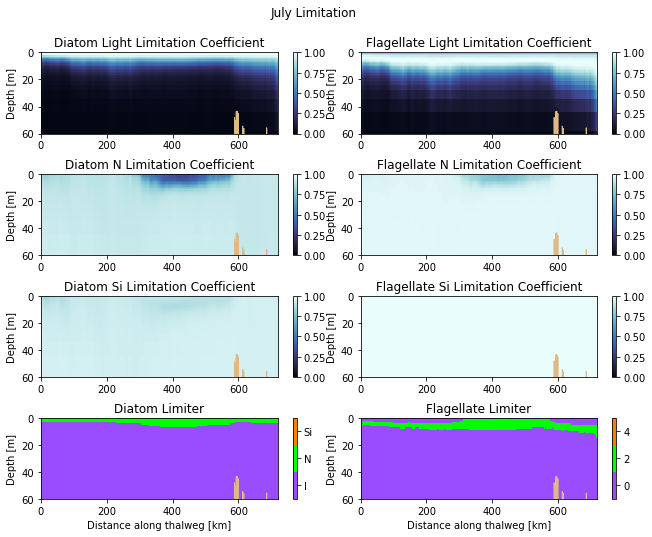

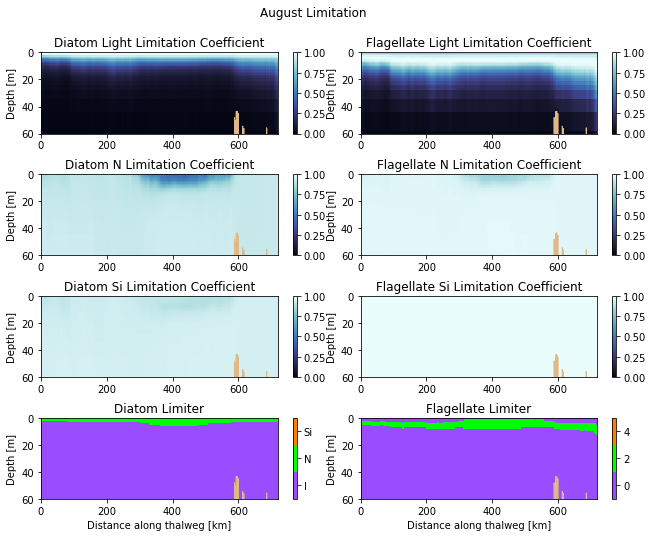

In [4]:
for mon in ['jun','jul','aug']:
    I=fdia[mon].variables['PAR'][0,:,:,:]
    NO=fptc[mon].variables['nitrate'][0,:,:,:]
    NH=fptc[mon].variables['ammonium'][0,:,:,:]
    Si=fptc[mon].variables['silicon'][0,:,:,:]
    D,M,N = bio.calc_p_limiters(I,NO,NH,Si,tmask[0,:,:,:],nampisprod)

    fig,ax=plt.subplots(4,2,figsize=(9,8))
    fig.subplots_adjust(hspace=.5,wspace=.08,left=0.08,right=1.03,top=.9)
    maxz=60
    iax=ax[0,0]
    m=visualisations.contour_thalweg(iax,D['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
    iax.set_title('Diatom Light Limitation Coefficient')
    iax.set_xlabel('')
    iax.set_ylim(maxz,0)

    iax=ax[1,0]
    m=visualisations.contour_thalweg(iax,D['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
    iax.set_title('Diatom N Limitation Coefficient')
    iax.set_xlabel('')
    iax.set_ylim(maxz,0)

    iax=ax[2,0]
    m=visualisations.contour_thalweg(iax,D['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
    iax.set_title('Diatom Si Limitation Coefficient')
    iax.set_xlabel('')
    iax.set_ylim(maxz,0)

    iax=ax[3,0]
    m=visualisations.contour_thalweg(iax,D['limiter'],fb,fm,method='pcolormesh',cmap=cm2,mesh_args={'vmin':-1,'vmax':5})
    m.set_ticks([0,2,4])
    m.set_ticklabels(['I','N','Si'])
    iax.set_title('Diatom Limiter')
    iax.set_ylim(maxz,0)

    iax=ax[0,1]
    m=visualisations.contour_thalweg(iax,N['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
    iax.set_title('Flagellate Light Limitation Coefficient')
    iax.set_xlabel('')
    iax.set_ylim(maxz,0)

    iax=ax[1,1]
    m=visualisations.contour_thalweg(iax,N['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
    iax.set_title('Flagellate N Limitation Coefficient')
    iax.set_xlabel('')
    iax.set_ylim(maxz,0)

    iax=ax[2,1]
    m=visualisations.contour_thalweg(iax,N['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
    iax.set_title('Flagellate Si Limitation Coefficient')
    iax.set_xlabel('')
    iax.set_ylim(maxz,0)

    iax=ax[3,1]
    m=visualisations.contour_thalweg(iax,N['limiter'],fb,fm,method='pcolormesh',cmap=cm2,mesh_args={'vmin':-1,'vmax':5})
    iax.set_title('Flagellate Limiter')
    iax.set_ylim(maxz,0)

    fig.suptitle(titles[mon])
    fig.savefig('/data/eolson/results/MEOPAR/figs/LightLimforSusan/limitationThw'+mon+'.png',dpi=400,transparent=True,bbox_inches='tight')